In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_dir = os.path.join(os.getcwd(), 'data', 'starcraft_player_data.csv')
df = pd.read_csv(df_dir)
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


# Data Quality Review and Exploratory Data Analysis

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GameID,3395.0,NaN,NaN,NaN,4805.012371,2719.944851,52.0,2464.5,4874.0,7108.5,10095.0
LeagueIndex,3395.0,NaN,NaN,NaN,4.184094,1.517327,1.0,3.0,4.0,5.0,8.0
Age,3395,29,20,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HoursPerWeek,3395,33,10,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalHours,3395,238,500,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APM,3395.0,NaN,NaN,NaN,117.046947,51.945291,22.0596,79.9002,108.0102,142.7904,389.8314
SelectByHotkeys,3395.0,NaN,NaN,NaN,0.004299,0.005284,0.0,0.001258,0.0025,0.005133,0.043088
AssignToHotkeys,3395.0,NaN,NaN,NaN,0.000374,0.000225,0.0,0.000204,0.000353,0.000499,0.001752
UniqueHotkeys,3395.0,NaN,NaN,NaN,4.364654,2.360333,0.0,3.0,4.0,6.0,10.0
MinimapAttacks,3395.0,NaN,NaN,NaN,0.000098,0.000166,0.0,0.0,0.00004,0.000119,0.003019


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [7]:
numerics = df.columns[2:]
cat = ['LeagueIndex']

In [8]:
def get_numerics_stats(df, numeric_vars):
    statistics_of_data_numerics = []
    for col in numeric_vars:
        statistics_of_data_numerics.append((col,
                                'numeric',
                                df[col].notnull().sum(),
                                f'{df[col].notnull().sum()/df.shape[0]*100}%',
                                len(df[df[col] == 0]),
                                df[col].min(),
                                df[col].max(),
                                df[col].mode()[0]
                                ))

    stats_df_numerics = pd.DataFrame(statistics_of_data_numerics, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common',])
    return stats_df_numerics

In [9]:
def get_cat_stats(df, categorical_vars):
    statistics_of_data_cats = []
    for col in categorical_vars:
        statistics_of_data_cats.append((col,
                                'categorical',
                                df[col].notnull().sum(),
                                f'{df[col].notnull().sum()/df.shape[0]*100}%',
                                len(df[df[col] == 0]),
                                df[col].nunique(),
                                df[col].mode()[0]
                                
                                ))
    stats_df_cats = pd.DataFrame(statistics_of_data_cats, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
    return stats_df_cats

In [10]:
get_numerics_stats(df, numerics)

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common
0,Age,numeric,3395,100.0%,0,16,?,20
1,HoursPerWeek,numeric,3395,100.0%,0,0,?,10
2,TotalHours,numeric,3395,100.0%,0,10,?,500
3,APM,numeric,3395,100.0%,0,22.0596,389.8314,42.3318
4,SelectByHotkeys,numeric,3395,100.0%,16,0.0,0.043088,0.0
5,AssignToHotkeys,numeric,3395,100.0%,6,0.0,0.001752,0.0
6,UniqueHotkeys,numeric,3395,100.0%,189,0,10,5
7,MinimapAttacks,numeric,3395,100.0%,877,0.0,0.003019,0.0
8,MinimapRightClicks,numeric,3395,100.0%,72,0.0,0.004041,0.0
9,NumberOfPACs,numeric,3395,100.0%,0,0.000679,0.007971,0.001727


In [11]:
get_cat_stats(df, cat)

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,LeagueIndex,categorical,3395,100.0%,0,8,4


In [12]:
def value_counts_plot(df, var_name, logy=False):
    df[var_name].value_counts().head(15).plot(kind='bar',logy=False, title='Number of Records for ' + var_name + ' (Top 15)') 
    plt.xlabel(var_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [13]:
def hist_plot(df, var_name, n_bin=30, kde=True, ylog=False, xlim_range=None):
    sns.distplot(df[var_name],bins=n_bin, kde=True)
    if xlim_range:
        plt.xlim(xlim_range)
    if ylog:
        plt.yscale('log')
    plt.xlabel(var_name)
    plt.ylabel('Frequence')
    plt.title('Histogram of ' + var_name)
    plt.show()

## Age

There exists '?' for this variable. Should be repalced with np.nan.

In [14]:
df['Age'].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', '?'], dtype=object)

In [15]:
df['Age'] = df['Age'].apply(lambda x: int(x) if x != '?' else np.nan)

In [16]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

<AxesSubplot:>

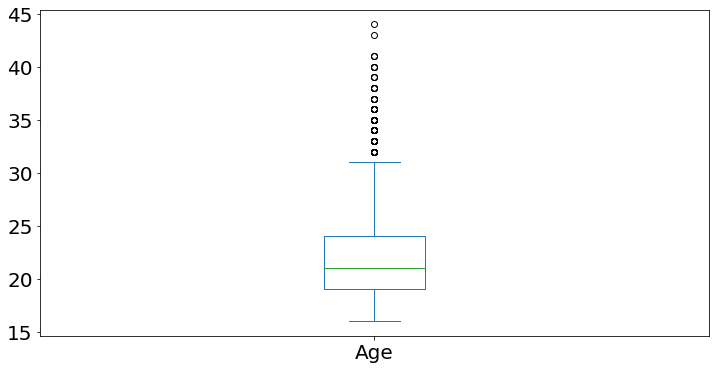

In [17]:
df['Age'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

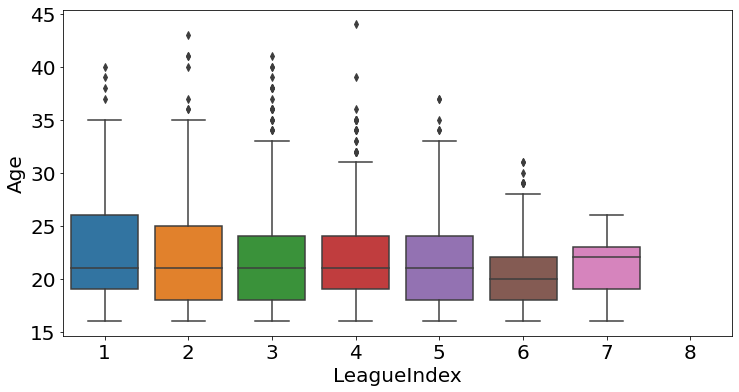

In [18]:
sns.boxplot(x="LeagueIndex", y="Age", data=df)

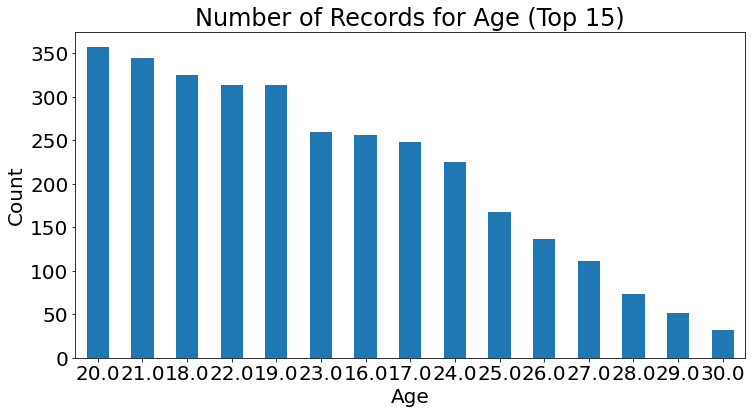

In [19]:
value_counts_plot(df, 'Age')

## HoursPerWeek

Similar to age. There exists '?' for this variable. Should be replaced with np.nan.

In [20]:
df['HoursPerWeek'].unique()

array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', '?', '80', '60'],
      dtype=object)

In [21]:
df['HoursPerWeek'] = df['HoursPerWeek'].apply(lambda x: int(x) if x != '?' else np.nan)

<AxesSubplot:>

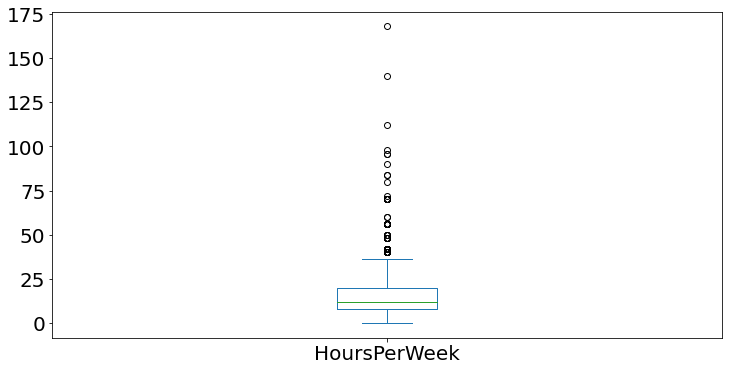

In [22]:
df['HoursPerWeek'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='HoursPerWeek'>

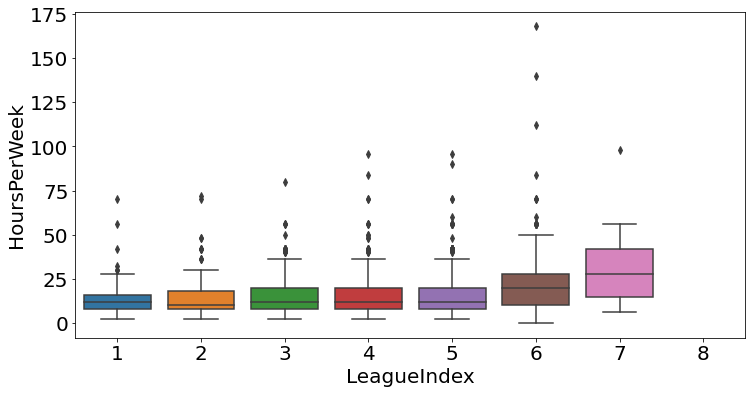

In [23]:
sns.boxplot(x="LeagueIndex", y="HoursPerWeek", data=df)

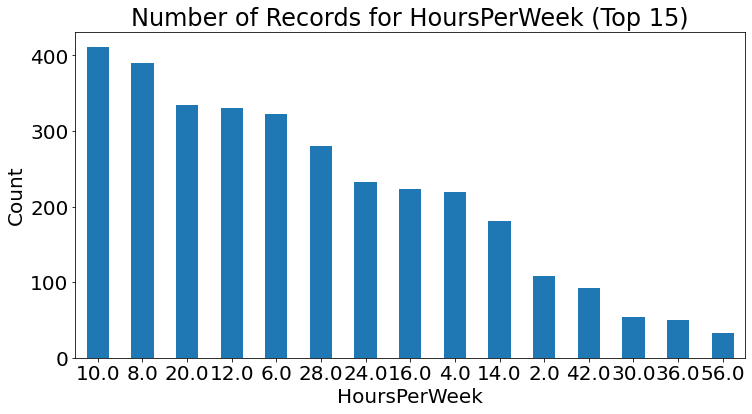

In [24]:
value_counts_plot(df, 'HoursPerWeek')

## TotalHours

In [25]:
df['TotalHours'].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

In [26]:
df['TotalHours'] = df['TotalHours'].apply(lambda x: int(x) if x != '?' else np.nan)

<AxesSubplot:>

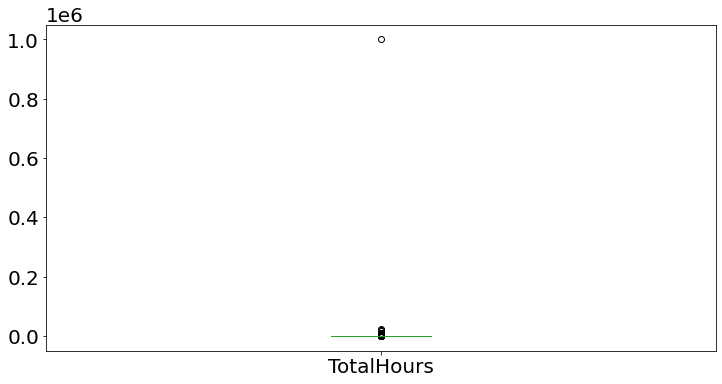

In [27]:
df['TotalHours'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='TotalHours'>

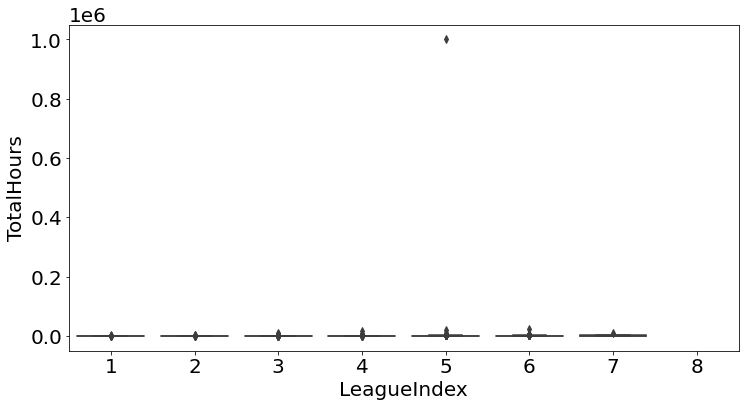

In [28]:
sns.boxplot(x="LeagueIndex", y="TotalHours", data=df)
# Extreme Value Spotted, need to replace it

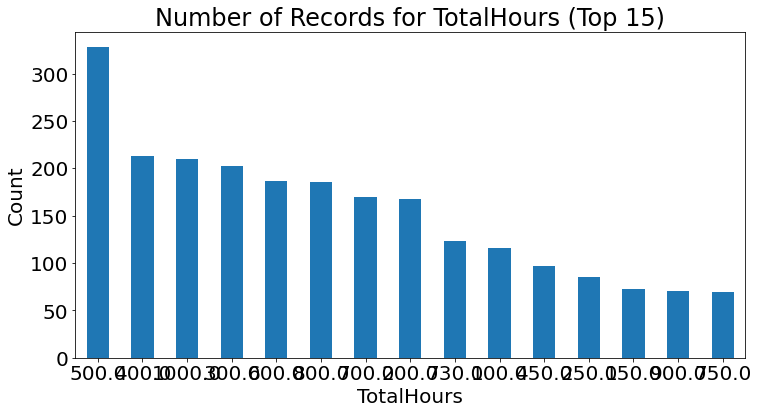

In [29]:
df['TotalHours'].value_counts().head(15).plot(kind='bar',logy=False, title='Number of Records for TotalHours (Top 15)') 
plt.xlabel('TotalHours')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## APM

<AxesSubplot:>

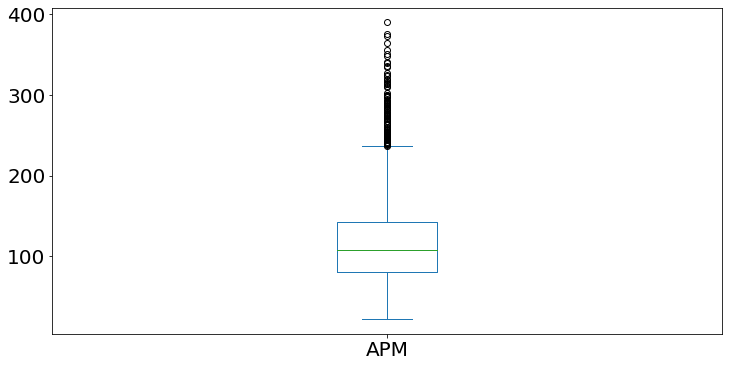

In [30]:
df['APM'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='APM'>

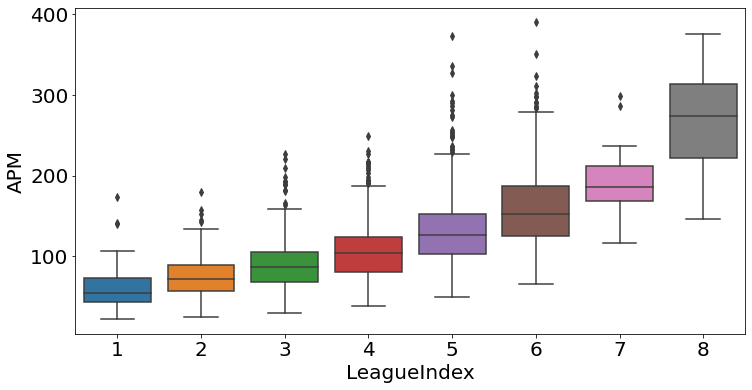

In [31]:
sns.boxplot(x="LeagueIndex", y="APM", data=df)

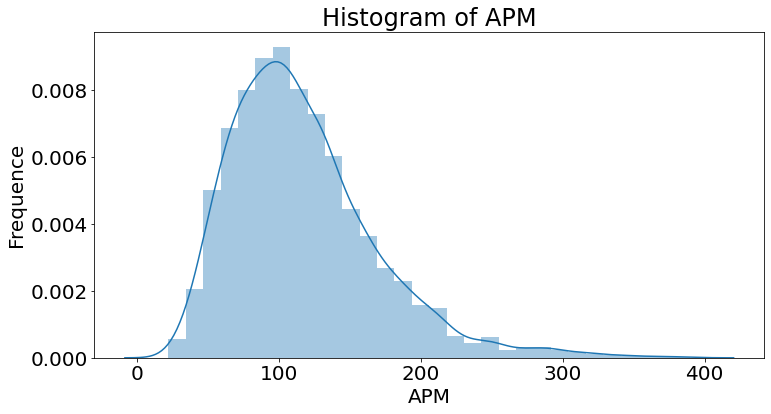

In [32]:
hist_plot(df, 'APM')

## SelectByHotkeys

<AxesSubplot:>

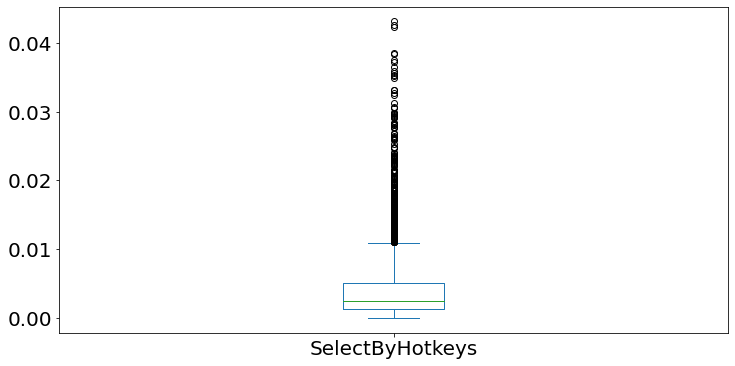

In [33]:
df['SelectByHotkeys'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='SelectByHotkeys'>

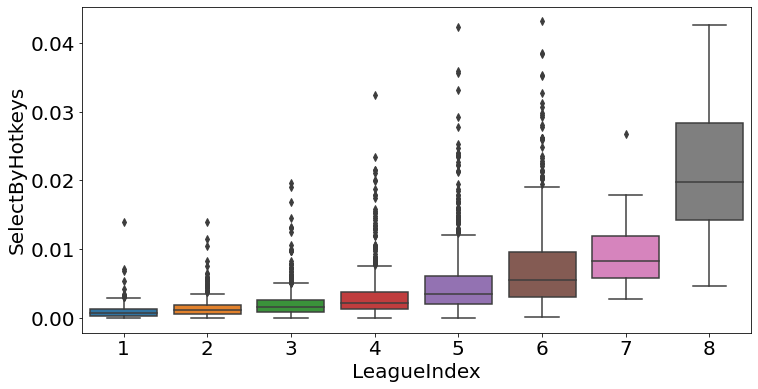

In [34]:
sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=df)

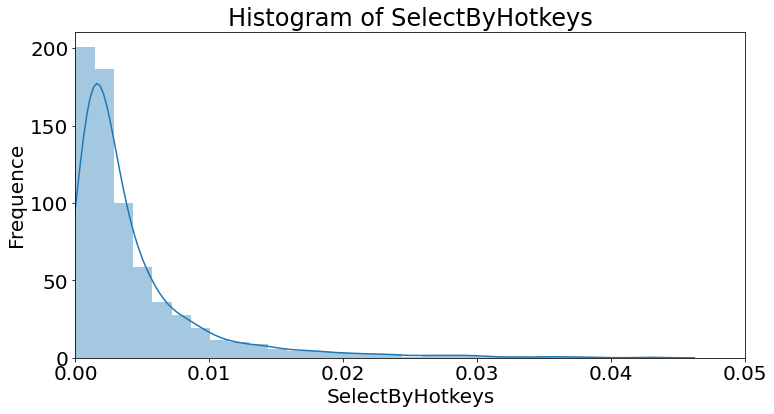

In [35]:
hist_plot(df, 'SelectByHotkeys', xlim_range=[0,0.05])

## AssignToHotkeys

<AxesSubplot:>

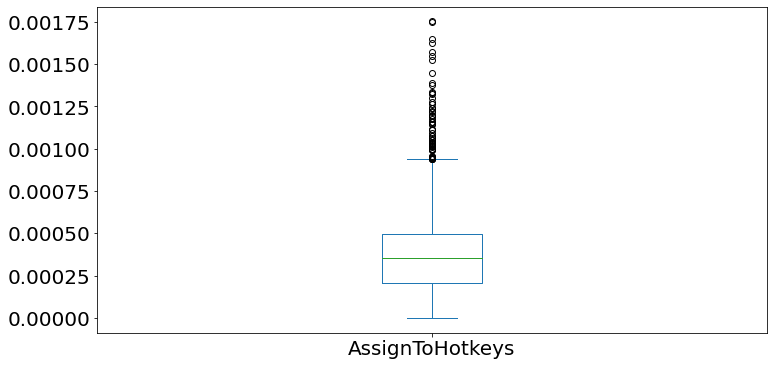

In [36]:
df['AssignToHotkeys'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='AssignToHotkeys'>

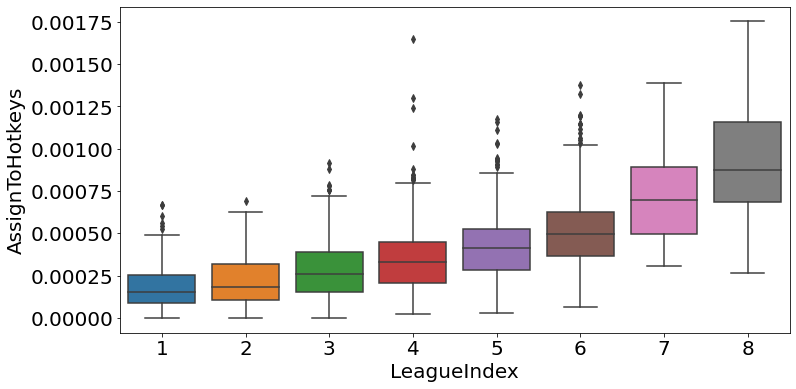

In [37]:
sns.boxplot(x="LeagueIndex", y="AssignToHotkeys", data=df)

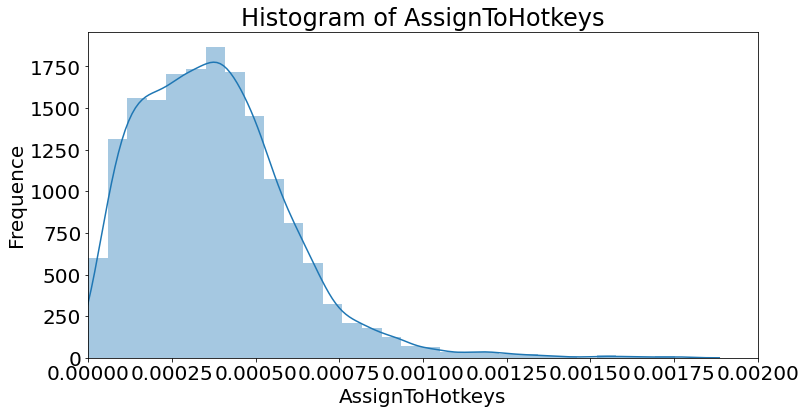

In [38]:
hist_plot(df, 'AssignToHotkeys', xlim_range=[0,0.002])

## UniqueHotkeys

<AxesSubplot:>

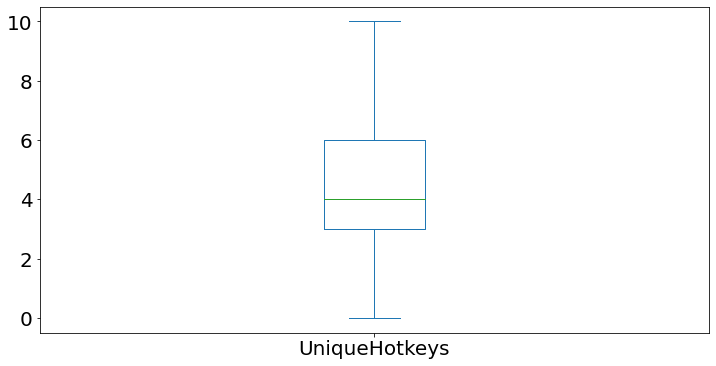

In [39]:
df['UniqueHotkeys'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='UniqueHotkeys'>

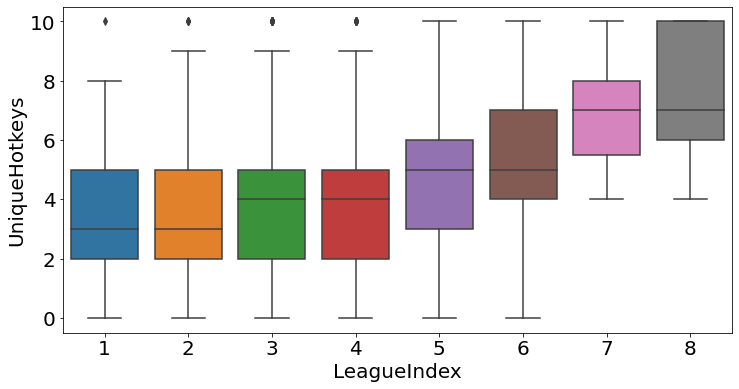

In [40]:
sns.boxplot(x="LeagueIndex", y="UniqueHotkeys", data=df)

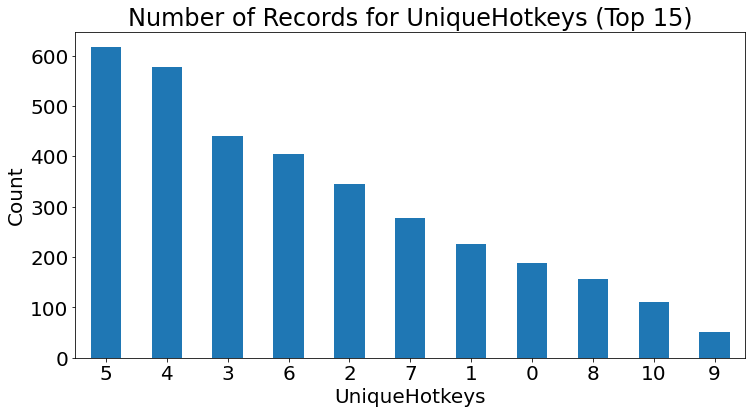

In [41]:
value_counts_plot(df, 'UniqueHotkeys')

## MinimapAttacks

<AxesSubplot:>

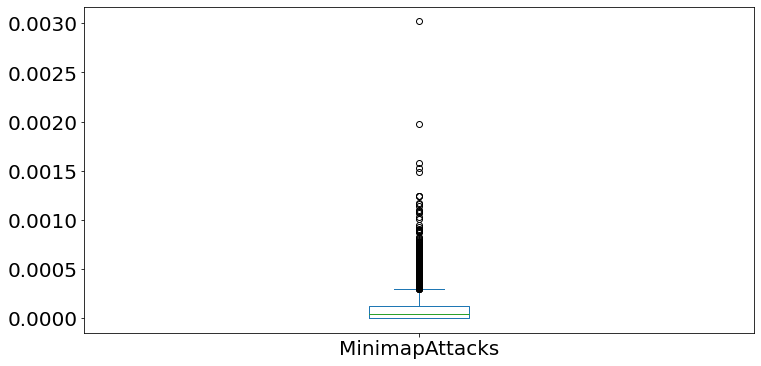

In [42]:
df['MinimapAttacks'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='MinimapAttacks'>

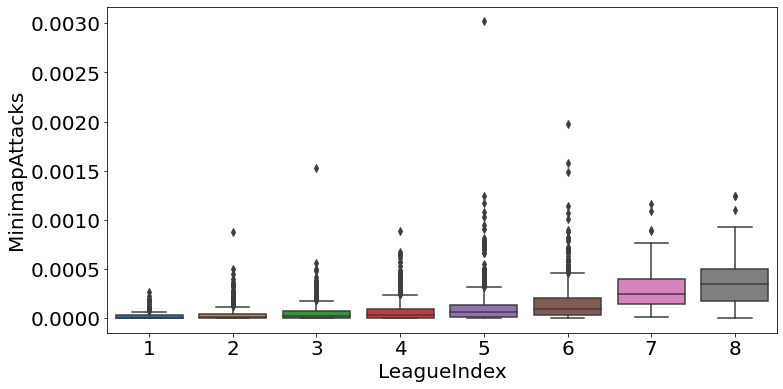

In [43]:
sns.boxplot(x="LeagueIndex", y="MinimapAttacks", data=df)

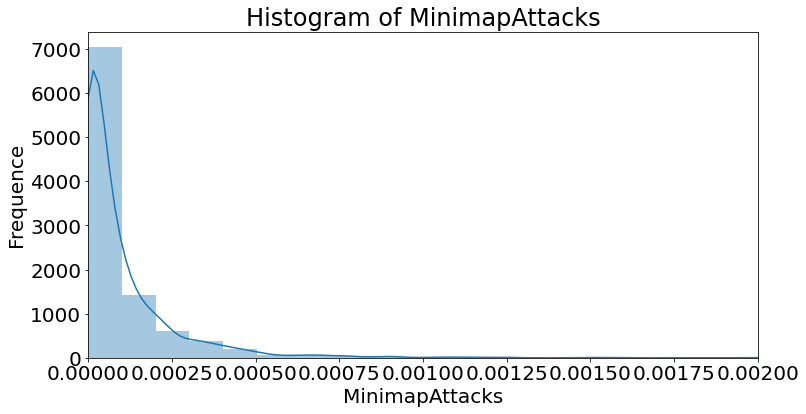

In [44]:
hist_plot(df, 'MinimapAttacks', xlim_range=[0,0.002])

## MinimapRightClicks

<AxesSubplot:>

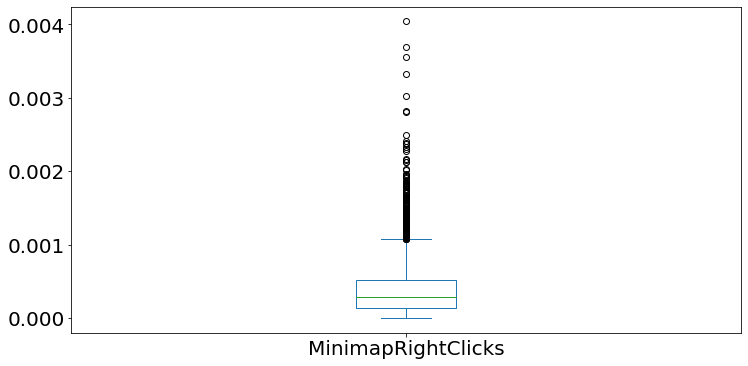

In [45]:
df['MinimapRightClicks'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='MinimapRightClicks'>

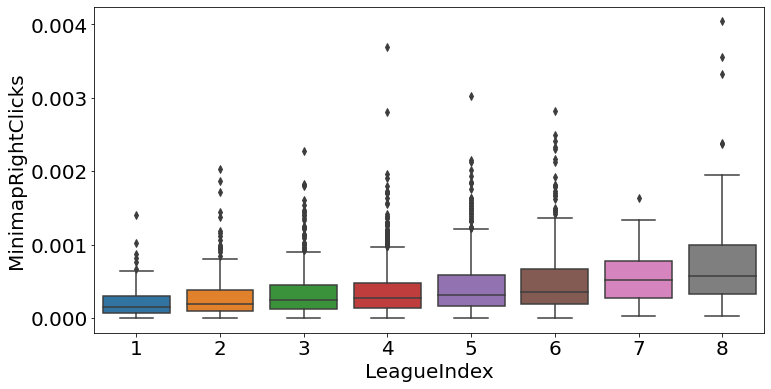

In [46]:
sns.boxplot(x="LeagueIndex", y="MinimapRightClicks", data=df)

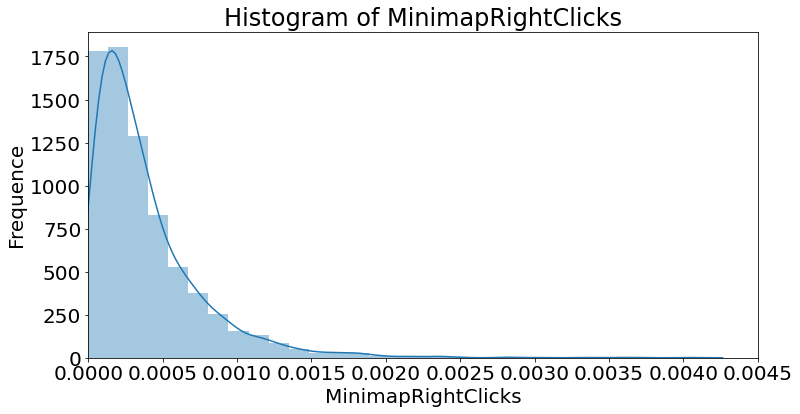

In [47]:
hist_plot(df, 'MinimapRightClicks', xlim_range=[0,0.0045])

## NumberOfPACs

<AxesSubplot:>

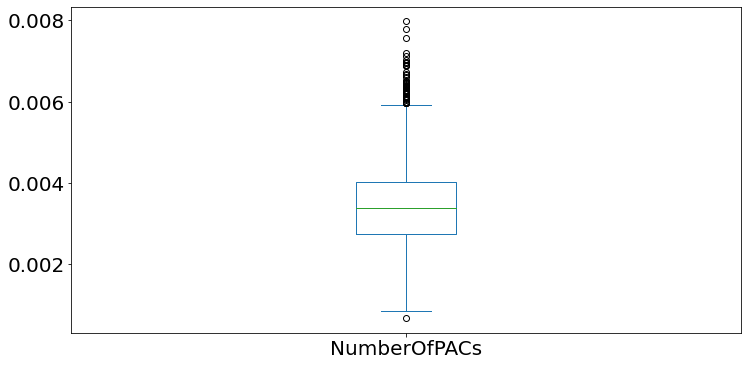

In [48]:
df['NumberOfPACs'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='NumberOfPACs'>

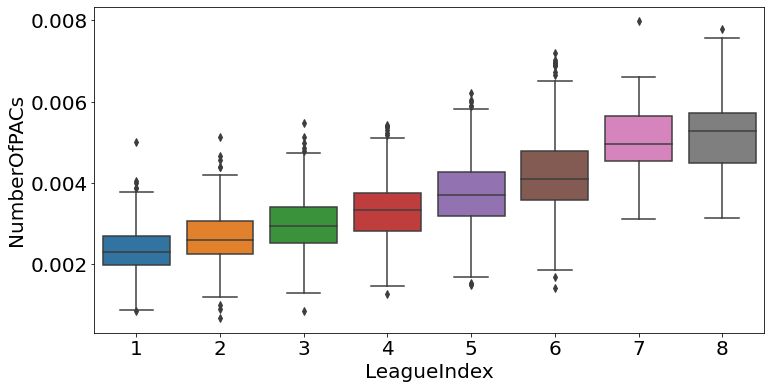

In [49]:
sns.boxplot(x="LeagueIndex", y="NumberOfPACs", data=df)

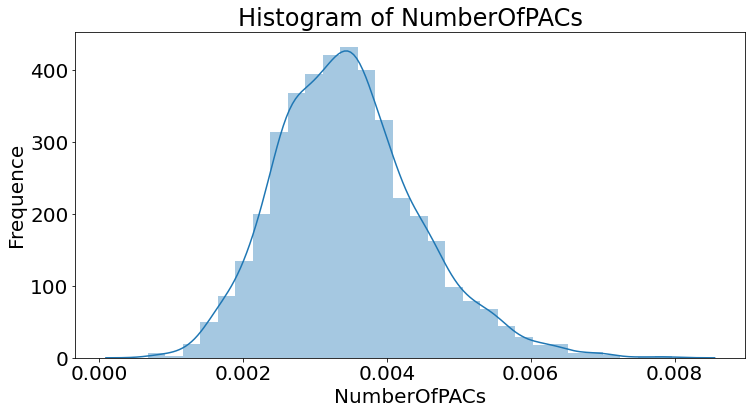

In [50]:
hist_plot(df, 'NumberOfPACs')

## GapBetweenPACs

<AxesSubplot:>

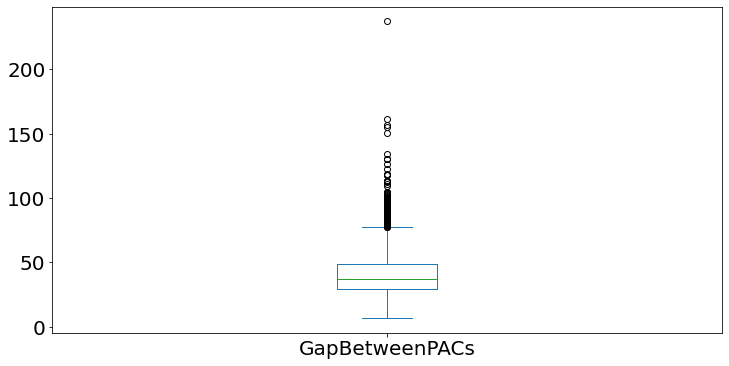

In [51]:
df['GapBetweenPACs'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='GapBetweenPACs'>

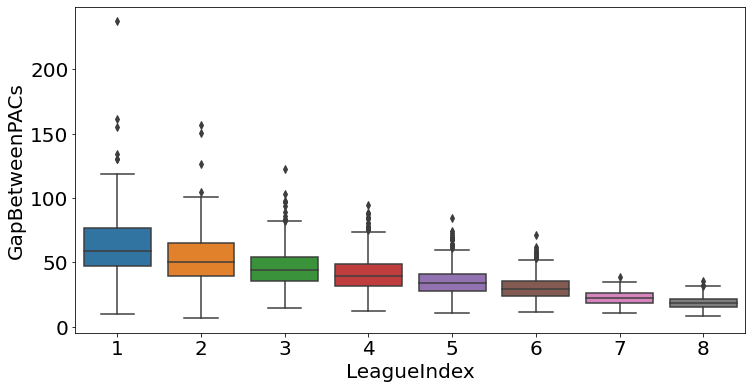

In [52]:
sns.boxplot(x="LeagueIndex", y="GapBetweenPACs", data=df)

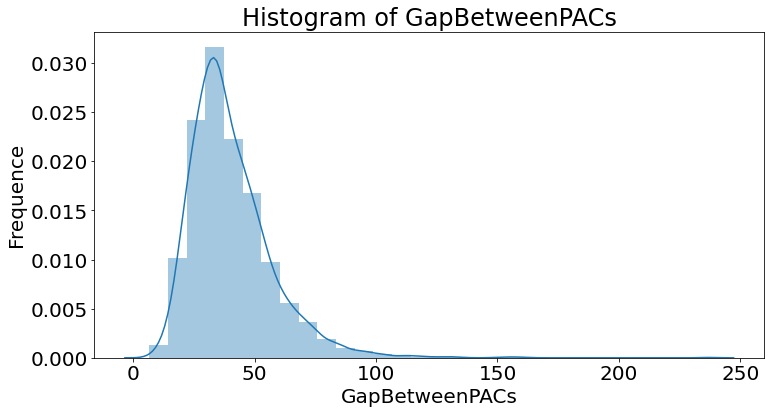

In [53]:
hist_plot(df, 'GapBetweenPACs')

## ActionLatency

<AxesSubplot:>

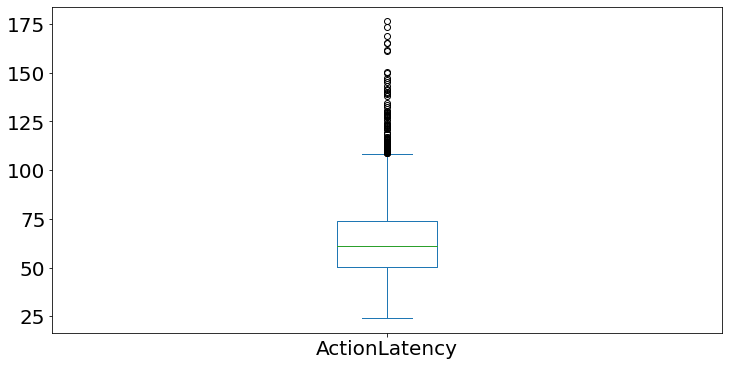

In [54]:
df['ActionLatency'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='ActionLatency'>

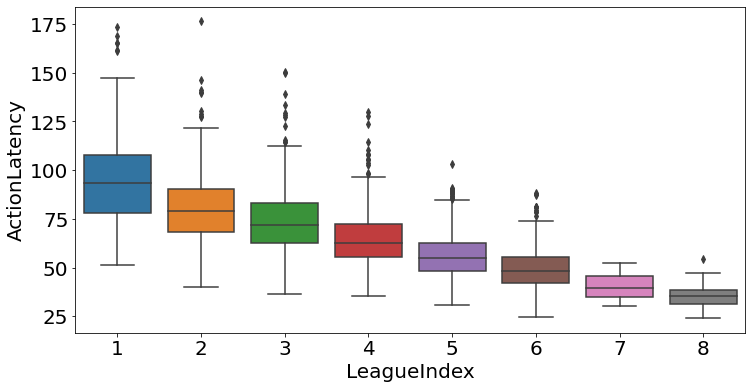

In [55]:
sns.boxplot(x="LeagueIndex", y="ActionLatency", data=df)

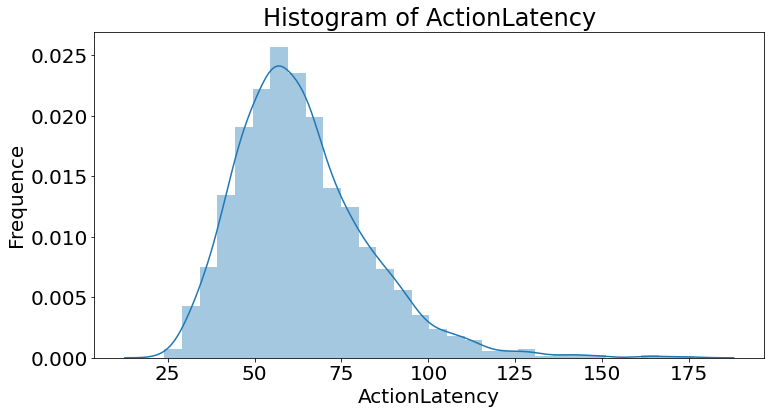

In [56]:
hist_plot(df, 'ActionLatency')

## ActionsInPAC

<AxesSubplot:>

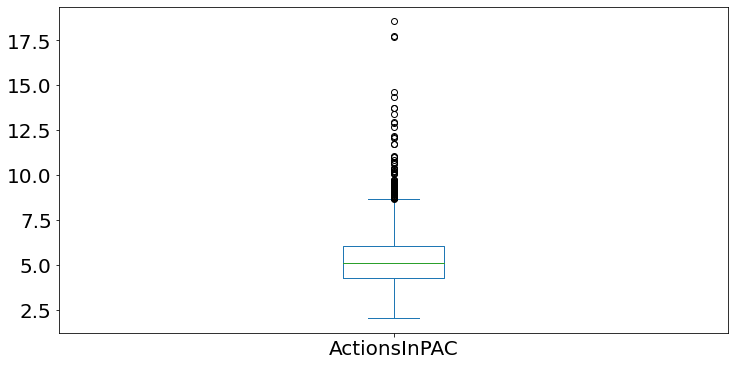

In [57]:
df['ActionsInPAC'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='ActionsInPAC'>

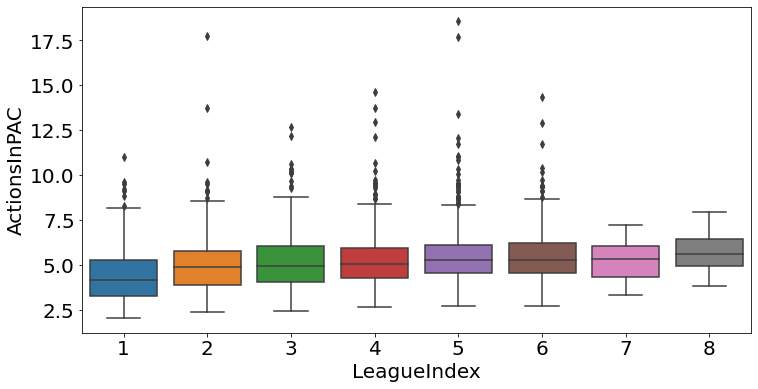

In [58]:
sns.boxplot(x="LeagueIndex", y="ActionsInPAC", data=df)

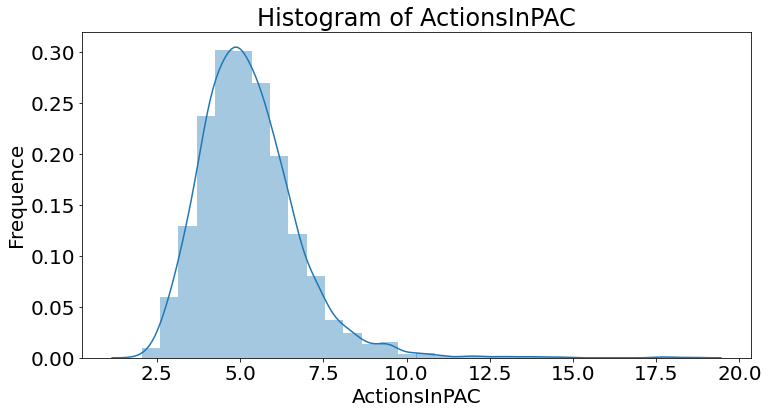

In [59]:
hist_plot(df, 'ActionsInPAC')

## TotalMapExplored

<AxesSubplot:>

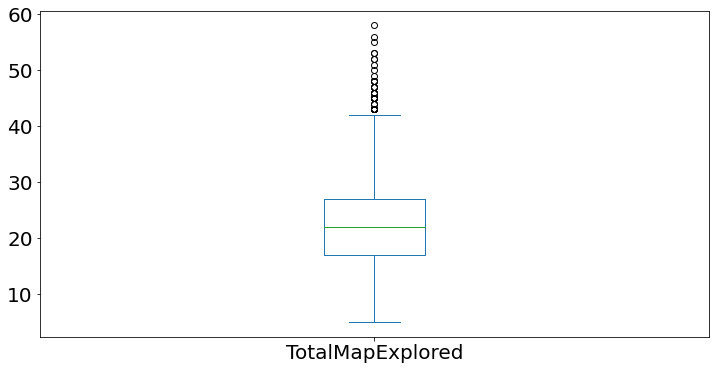

In [60]:
df['TotalMapExplored'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='TotalMapExplored'>

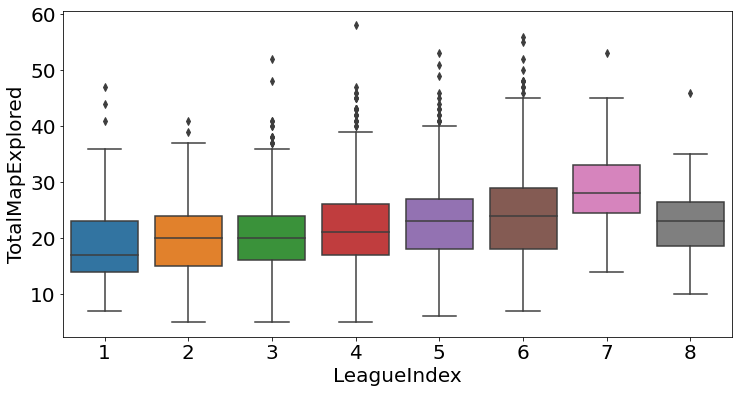

In [61]:
sns.boxplot(x="LeagueIndex", y="TotalMapExplored", data=df)

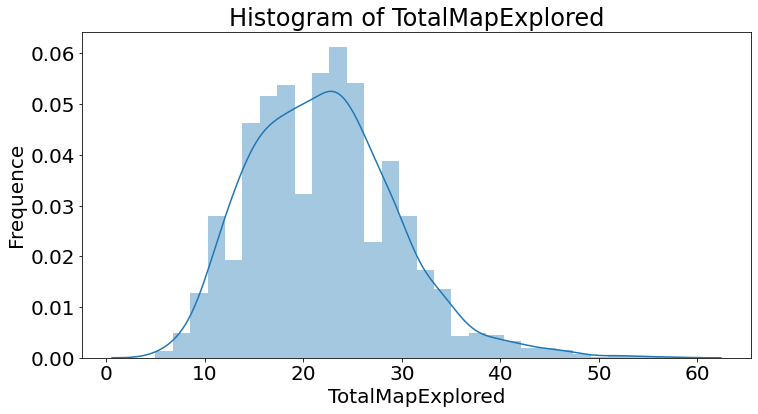

In [62]:
hist_plot(df, 'TotalMapExplored')

## WorkersMade

<AxesSubplot:>

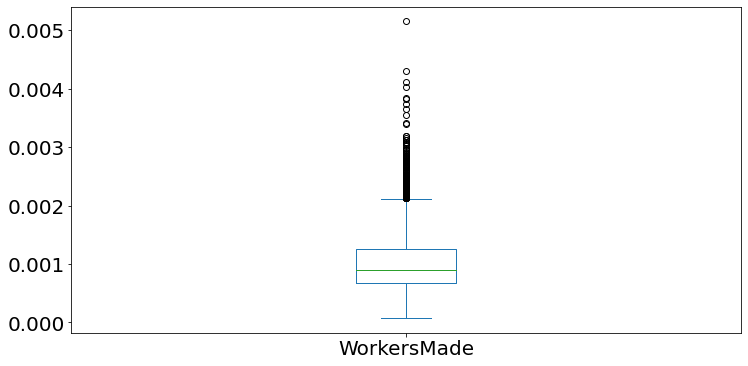

In [63]:
df['WorkersMade'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='WorkersMade'>

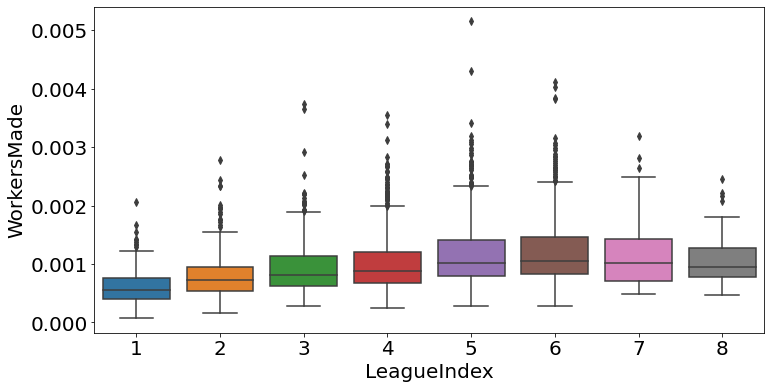

In [64]:
sns.boxplot(x="LeagueIndex", y="WorkersMade", data=df)

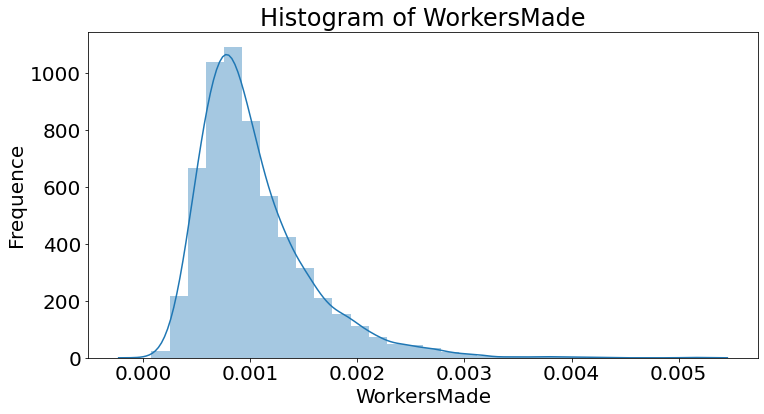

In [65]:
hist_plot(df, 'WorkersMade')

## UniqueUnitsMade

<AxesSubplot:>

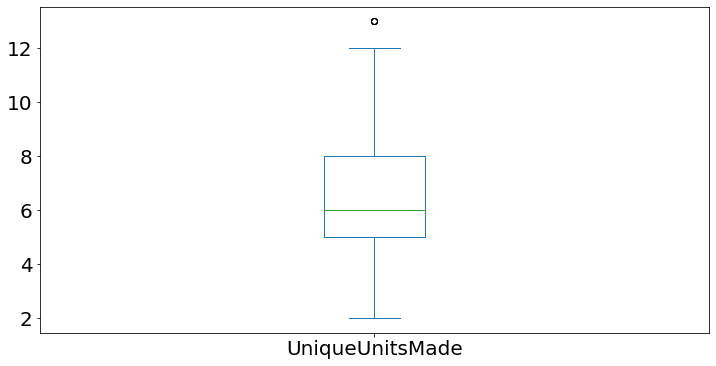

In [66]:
df['UniqueUnitsMade'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='UniqueUnitsMade'>

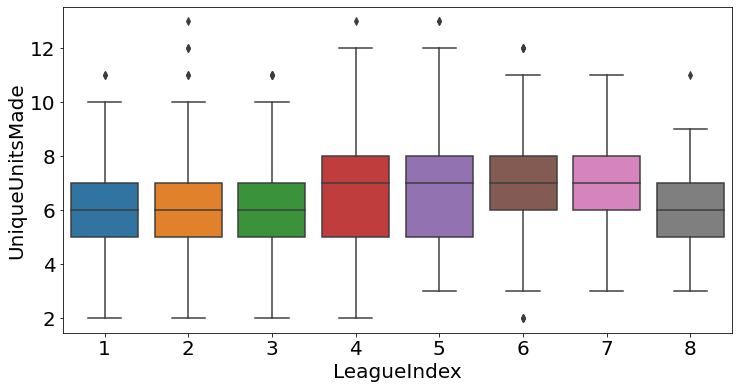

In [67]:
sns.boxplot(x="LeagueIndex", y="UniqueUnitsMade", data=df)

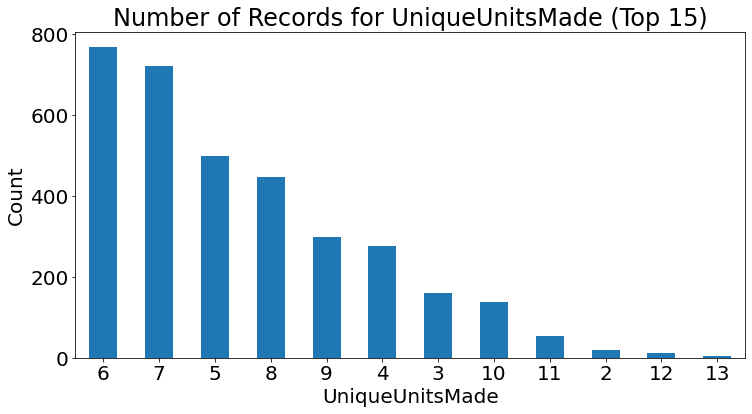

In [68]:
value_counts_plot(df, 'UniqueUnitsMade')

## ComplexUnitsMade

<AxesSubplot:>

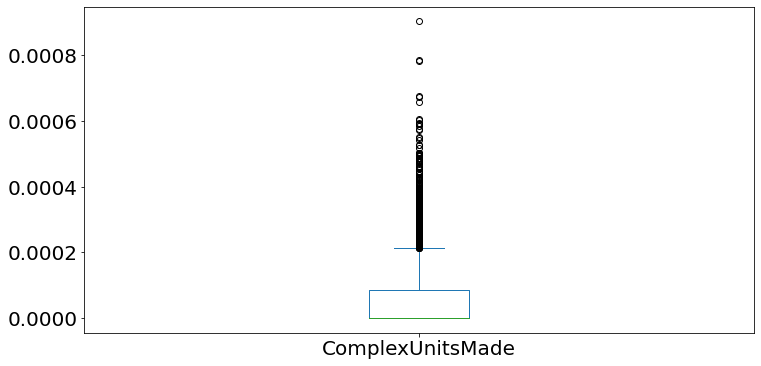

In [69]:
df['ComplexUnitsMade'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='ComplexUnitsMade'>

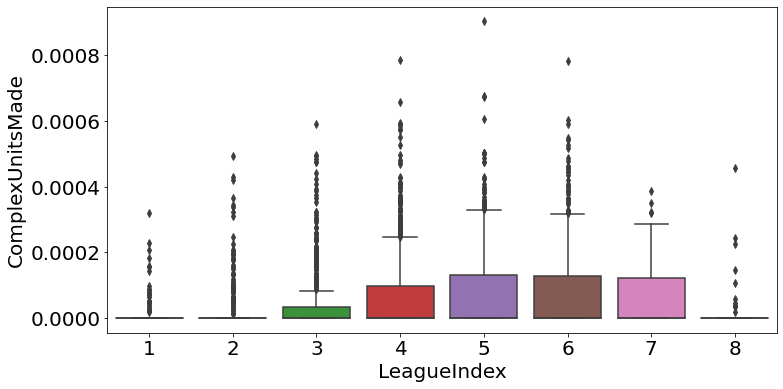

In [70]:
sns.boxplot(x="LeagueIndex", y="ComplexUnitsMade", data=df)

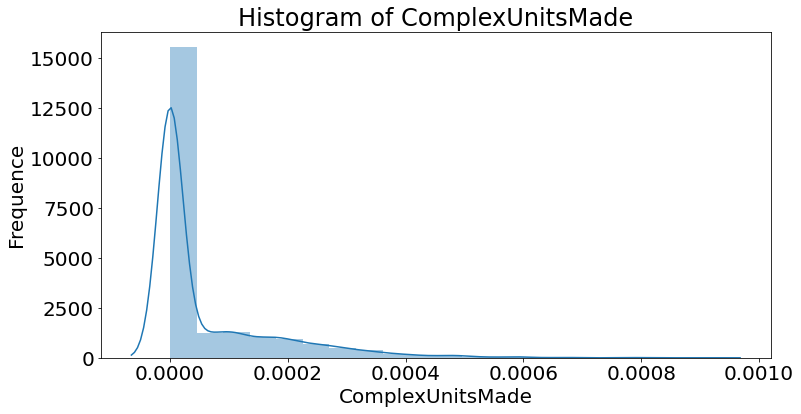

In [71]:
hist_plot(df, 'ComplexUnitsMade', n_bin=20)

## ComplexAbilitiesUsed

<AxesSubplot:>

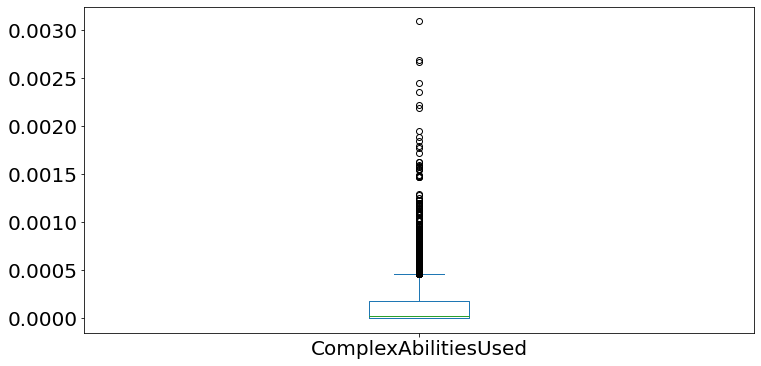

In [72]:
df['ComplexAbilitiesUsed'].plot(kind='box')

<AxesSubplot:xlabel='LeagueIndex', ylabel='ComplexAbilitiesUsed'>

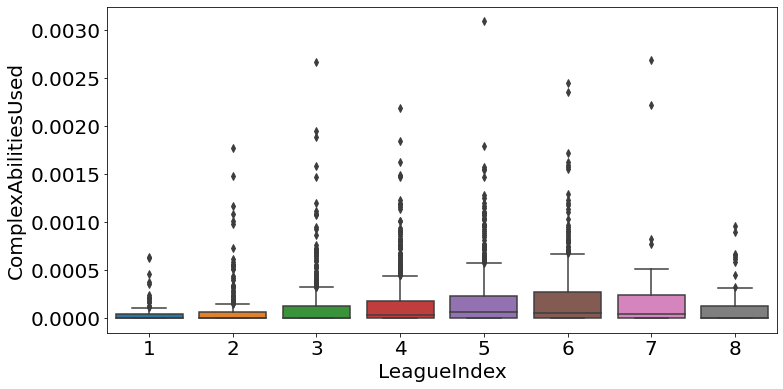

In [73]:
sns.boxplot(x="LeagueIndex", y="ComplexAbilitiesUsed", data=df)

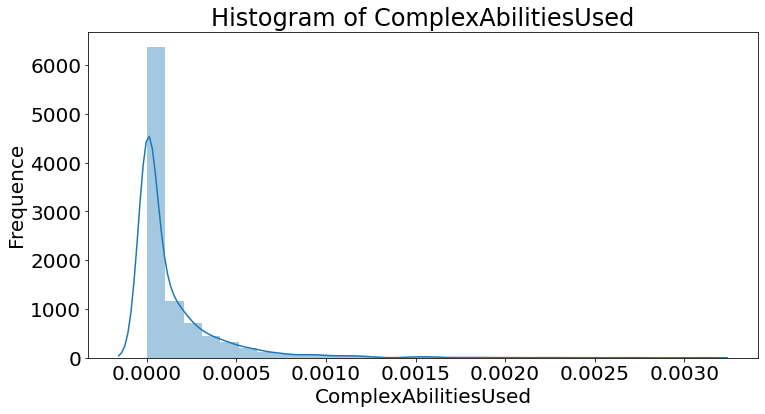

In [74]:
hist_plot(df, 'ComplexAbilitiesUsed')

# Data Cleaning and Preprocessing

In [75]:
df_copy = df.copy()

In [76]:
get_numerics_stats(df, numerics)

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common
0,Age,numeric,3340,98.37997054491899%,0,16.000000,44.000000,20.000000
1,HoursPerWeek,numeric,3339,98.35051546391752%,1,0.000000,168.000000,10.000000
2,TotalHours,numeric,3338,98.32106038291604%,0,3.000000,1000000.000000,500.000000
3,APM,numeric,3395,100.0%,0,22.059600,389.831400,42.331800
4,SelectByHotkeys,numeric,3395,100.0%,16,0.000000,0.043088,0.000000
5,AssignToHotkeys,numeric,3395,100.0%,6,0.000000,0.001752,0.000000
6,UniqueHotkeys,numeric,3395,100.0%,189,0.000000,10.000000,5.000000
7,MinimapAttacks,numeric,3395,100.0%,877,0.000000,0.003019,0.000000
8,MinimapRightClicks,numeric,3395,100.0%,72,0.000000,0.004041,0.000000
9,NumberOfPACs,numeric,3395,100.0%,0,0.000679,0.007971,0.001727


## Age

It is noticable that there are 55 missing values for Age for gamers with LeagueIndex=8, and that is all the missing values for Age. For esports, some variables, such as APM, can be correlated to age, and thus a correlation table is used to find the top 5 most correlated variables for the variable Age in this dataset. Then, these strongly correlated features are used to implement a knn imputer to fill in the missing values for the variable Age.

In [77]:
df_corr_table = df.corr()
df_corr_table

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.102601,0.088863,-0.025456,0.004178,0.159691,0.160802,0.136184,0.117366,0.074045,0.046583,0.089635,-0.102572,-0.087222,0.047255,0.032313,-0.011636,0.021204,-0.027098,0.003248
LeagueIndex,0.102601,1.000000,-0.127825,0.217976,0.023884,0.662309,0.490599,0.531125,0.351213,0.312544,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.220676,0.295643,0.133508,0.148834,0.145733
Age,0.088863,-0.127825,1.000000,-0.184508,-0.016630,-0.210559,-0.131177,-0.105609,0.015447,0.043390,-0.019582,-0.197282,0.112021,0.240348,-0.045406,-0.024605,-0.092102,0.023018,-0.080237,-0.065738
HoursPerWeek,-0.025456,0.217976,-0.184508,1.000000,0.024306,0.246844,0.205785,0.158423,0.070200,0.084044,0.049424,0.174948,-0.133770,-0.188775,0.095091,0.065003,0.050623,0.038548,0.059325,0.074702
TotalHours,0.004178,0.023884,-0.016630,0.024306,1.000000,0.072850,0.081830,0.042415,0.009318,0.000869,0.007662,0.039577,-0.020644,-0.035700,0.010704,0.020486,0.014828,-0.002379,-0.007154,-0.006311
APM,0.159691,0.662309,-0.210559,0.246844,0.072850,1.000000,0.840693,0.578416,0.361704,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.220749,0.349692,0.100844,0.136143,0.131587
SelectByHotkeys,0.160802,0.490599,-0.131177,0.205785,0.081830,0.840693,1.000000,0.504526,0.302096,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.083481,0.141723,0.006121,0.044002,0.061037
AssignToHotkeys,0.136184,0.531125,-0.105609,0.158423,0.042415,0.578416,0.504526,1.000000,0.420242,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.192928,0.183065,0.132829,0.144603,0.154410
UniqueHotkeys,0.117366,0.351213,0.015447,0.070200,0.009318,0.361704,0.302096,0.420242,1.000000,0.180592,0.141576,0.372079,-0.242815,-0.323103,-0.016400,0.264650,0.108141,0.225030,0.110363,0.102453
MinimapAttacks,0.074045,0.312544,0.043390,0.084044,0.000869,0.271021,0.197158,0.242196,0.180592,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.166392,0.077624,0.120824,0.040239,0.044528


In [78]:
age_strong_corr = list(df_corr_table['Age'].apply(lambda x: abs(x)).sort_values(ascending=False).head(6).index)
age_strong_corr

['Age',
 'ActionLatency',
 'APM',
 'NumberOfPACs',
 'HoursPerWeek',
 'SelectByHotkeys']

In [79]:
df_age_temp = df[age_strong_corr]
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_age_imputed = pd.DataFrame(imputer.fit_transform(df_age_temp), columns=df_age_temp.columns)
df['Age'] = df_age_imputed['Age'].apply(lambda x: int(x))

## HoursPerWeek

We notice there are missing values for HoursPerWeek, 55 records with a LeagueIndex=8 and 1 record with a LeagueIndex=5. To impute them, again, we use the correlation table to choose the top 5 variables with a strong correlation to HoursPerWeek and then implement a knn imputer.

Also, in the DQR part, we notice there are extreme values for HoursPerWeek. For example, there is one record with a value of 168, which is the total number of hours in a week, and one record with a value of 0. Such records are logically impossible, and thus, we identify these two records as inappropriate values and replace them with the next minimum and next maximum value. Thus, we replace the value 0 with 2 and the value 168 with 140.

In [80]:
hpw_strong_corr = list(df_corr_table['HoursPerWeek'].apply(lambda x: abs(x)).sort_values(ascending=False).head(6).index)
hpw_strong_corr

['HoursPerWeek',
 'APM',
 'LeagueIndex',
 'SelectByHotkeys',
 'ActionLatency',
 'Age']

In [81]:
df_th_temp = df[hpw_strong_corr]
df_th_imputed = pd.DataFrame(imputer.fit_transform(df_th_temp), columns=df_th_temp.columns)
df['HoursPerWeek'] = df_th_imputed['HoursPerWeek'].apply(lambda x: int(x))

In [82]:
df.loc[df['HoursPerWeek'] == 0,'HoursPerWeek'] = df[df['HoursPerWeek'] > 0]['HoursPerWeek'].min()
df.loc[df['HoursPerWeek'] == 168,'HoursPerWeek'] = df[df['HoursPerWeek'] < 168]['HoursPerWeek'].max()


## TotalHours

Similarly, we notice there are 55 missing values for TotalHours for records with LeagueIndex=8, and there are 2 missing values for TotalHours for records with LeagueIndex=5. To impute them, again, we use the correlation table to choose the top 5 variables with a strong correlation to TotalHours and then implement a knn imputer.

In the DQR part, we notice there are extreme values for TotalHours as well. For example, there is one record with a value of 1000000, which is very likely to be an anomaly. So we change its value to 25000. 

In [83]:
th_strong_corr = list(df_corr_table['TotalHours'].apply(lambda x: abs(x)).sort_values(ascending=False).head(6).index)
th_strong_corr

['TotalHours',
 'SelectByHotkeys',
 'APM',
 'AssignToHotkeys',
 'NumberOfPACs',
 'ActionLatency']

In [84]:
df['TotalHours'].dropna().sort_values(ascending=False)

1793    1000000.0
2324      25000.0
770       20000.0
1978      18000.0
2216      10260.0
          ...    
184          10.0
1502         10.0
328          10.0
402           7.0
976           3.0
Name: TotalHours, Length: 3338, dtype: float64

In [85]:
df.loc[df['TotalHours'] == 1000000, 'TotalHours'] = 25000
df.loc[df['TotalHours'] < df['HoursPerWeek'],'TotalHours'] = df.loc[df['TotalHours'] < df['HoursPerWeek'],'HoursPerWeek']

In [86]:
df_th_temp = df[th_strong_corr]
df_th_imputed = pd.DataFrame(imputer.fit_transform(df_th_temp), columns=df_th_temp.columns)
df['TotalHours'] = df_th_imputed['TotalHours'].apply(lambda x: int(x))

For other features, the extreme values problem is less severe. Since the dataset stores the records of normal players and professional players, and the talented players do have the ability to largely outperform other players, the records are left unchanged.

# Feature Engineering

Since the dataset stores the records of normal players and professional players, and the talented players do have the ability to largely outperform other players, we do not want to change the distribution for each of the variables. Thus, a min-max scaling instead of normalization is implemented.

In [87]:
df_fe_copy = df.copy()

In [88]:
from sklearn import preprocessing

min_max_feat = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed']

scaler = preprocessing.MinMaxScaler()
df[min_max_feat] = scaler.fit_transform(df[min_max_feat])

# Modeling

Since there are 3390 records with only 20 features, we do not actually have to intentionally drop features. 

In [89]:
df_feat_copy = df.copy()

In [90]:
df.corr()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.102601,0.074529,-0.008581,0.061993,0.159691,0.160802,0.136184,0.117366,0.074045,0.046583,0.089635,-0.102572,-0.087222,0.047255,0.032313,-0.011636,0.021204,-0.027098,0.003248
LeagueIndex,0.102601,1.000000,-0.135508,0.226829,0.273336,0.662309,0.490599,0.531125,0.351213,0.312544,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.220676,0.295643,0.133508,0.148834,0.145733
Age,0.074529,-0.135508,1.000000,-0.187405,-0.047329,-0.208692,-0.131811,-0.112289,0.007503,0.027791,-0.025710,-0.200806,0.118012,0.244253,-0.046996,-0.026425,-0.091288,0.023323,-0.076855,-0.064781
HoursPerWeek,-0.008581,0.226829,-0.187405,1.000000,0.234744,0.251394,0.209802,0.167617,0.078542,0.094781,0.059659,0.182995,-0.142289,-0.196864,0.097700,0.064911,0.051703,0.035642,0.055471,0.073234
TotalHours,0.061993,0.273336,-0.047329,0.234744,1.000000,0.285180,0.252982,0.167449,0.099725,0.154036,0.099634,0.197977,-0.165263,-0.213643,0.079714,0.090288,0.091952,0.042520,0.027151,0.044580
APM,0.159691,0.662309,-0.208692,0.251394,0.285180,1.000000,0.840693,0.578416,0.361704,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.220749,0.349692,0.100844,0.136143,0.131587
SelectByHotkeys,0.160802,0.490599,-0.131811,0.209802,0.252982,0.840693,1.000000,0.504526,0.302096,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.083481,0.141723,0.006121,0.044002,0.061037
AssignToHotkeys,0.136184,0.531125,-0.112289,0.167617,0.167449,0.578416,0.504526,1.000000,0.420242,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.192928,0.183065,0.132829,0.144603,0.154410
UniqueHotkeys,0.117366,0.351213,0.007503,0.078542,0.099725,0.361704,0.302096,0.420242,1.000000,0.180592,0.141576,0.372079,-0.242815,-0.323103,-0.016400,0.264650,0.108141,0.225030,0.110363,0.102453
MinimapAttacks,0.074045,0.312544,0.027791,0.094781,0.154036,0.271021,0.197158,0.242196,0.180592,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.166392,0.077624,0.120824,0.040239,0.044528


In [92]:
import sys
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
import pickle

Y = df['LeagueIndex']
X = df[df.columns.drop(['GameID','LeagueIndex'])]
model_dict = {}

## Decision Tree

In [95]:
# Decision Tree
dt = DecisionTreeRegressor() # simple, fast nonlinear model for the wrapper
dt_sfs = SFS(dt,k_features=18,forward=True,verbose=0,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
dt_sfs.fit(X,Y)
print('-------- finished working on sfs --------')

max_i = 0
best_score = -sys.maxsize
metric_dict = dt_sfs.get_metric_dict()
for i in metric_dict:
    if metric_dict[i]['avg_score'] > best_score:
        best_score = metric_dict[i]['avg_score']
        max_i = i

dt_best_feat = list(metric_dict[max_i]['feature_names'])
print('Best features for decision tree model are', dt_best_feat)

# decision tree
dt_param_grid = { 'max_depth': range(3,20), 'max_features': ['sqrt','log2', None] }
dt_search_result = GridSearchCV(DecisionTreeRegressor(), param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_search_result.fit(X[dt_best_feat],Y)
model_dict['dt'] = {'best_feat': dt_best_feat, 'best_params':dt_search_result.best_params_, 'best_score':dt_search_result.best_score_}

with open('model_dict.pkl','wb') as f:
    pickle.dump(model_dict, f)


-------- finished working on sfs --------
Best features for decision tree model are ['Age', 'TotalHours', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']


## Random Forest

In [102]:
# Random Forest
rf = RandomForestRegressor() # simple, fast nonlinear model for the wrapper
rf_sfs = SFS(rf,k_features=18,forward=True,verbose=0,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
rf_sfs.fit(X,Y)

max_i = 0
best_score = -sys.maxsize
metric_dict = rf_sfs.get_metric_dict()
for i in metric_dict:
    if metric_dict[i]['avg_score'] > best_score:
        best_score = metric_dict[i]['avg_score']
        max_i = i

rf_best_feat = list(metric_dict[max_i]['feature_names'])
rf_best_feat

['Age',
 'TotalHours',
 'SelectByHotkeys',
 'AssignToHotkeys',
 'UniqueHotkeys',
 'MinimapAttacks',
 'GapBetweenPACs',
 'ActionLatency',
 'ActionsInPAC',
 'TotalMapExplored',
 'WorkersMade',
 'UniqueUnitsMade',
 'ComplexUnitsMade',
 'ComplexAbilitiesUsed']

In [105]:
# random forest
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning with grid-search
rf_param_grid = { 'n_estimators': np.arange(50,150,10), 'max_depth': range(3,12), 'bootstrap': [True, False] }
rf_search_result = GridSearchCV(RandomForestRegressor(), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_search_result.fit(X[rf_best_feat],Y)
model_dict['rf'] = {'best_feat':rf_best_feat, 'best_params':rf_search_result.best_params_, 'best_score':rf_search_result.best_score_}


In [109]:
import pickle
with open('model_dict.pkl','wb') as f:
    pickle.dump(model_dict, f)

## XGBoost

In [114]:
# xgboost
import xgboost as xgb
import pickle

xgb_reg = xgb.XGBRegressor()
xgb_sfs = SFS(xgb_reg,k_features=18,forward=True,verbose=0,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
xgb_sfs.fit(X,Y)
print('-------- finished working on sfs --------')

max_i = 0
best_score = -sys.maxsize
metric_dict = xgb_sfs.get_metric_dict()
for i in metric_dict:
    if metric_dict[i]['avg_score'] > best_score:
        best_score = metric_dict[i]['avg_score']
        max_i = i

xgb_best_feat = list(metric_dict[max_i]['feature_names'])
print('Best features for XGBoost model are', xgb_best_feat)

# xgboost
xgb_param_grid = { 'max_depth': range(3,12), 'n_estimators': np.arange(50,150,10), 'gamma': range(5) }
xgb_search_result = GridSearchCV(xgb.XGBRegressor(), param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_search_result.fit(X[xgb_best_feat],Y)
model_dict['xgb'] = {'best_feat': xgb_best_feat,'best_params':xgb_search_result.best_params_, 'best_score':xgb_search_result.best_score_}

with open('model_dict.pkl','wb') as f:
    pickle.dump(model_dict, f)


-------- finished working on sfs --------
Best features for XGBoost model are ['Age', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']


In [96]:
model_dict

{'rf': {'best_params': {'bootstrap': True,
   'max_depth': 11,
   'n_estimators': 110},
  'best_score': -0.9024132918722783},
 'xgb': {'best_params': {'gamma': 2, 'max_depth': 3, 'n_estimators': 50},
  'best_score': -0.9206221836375917},
 'dt': {'best_params': {'max_depth': 5, 'max_features': None},
  'best_score': -1.1143808435220133}}

# Final Model

As we can see from result of the model_dict, random forest has the best score in terms of root mean squared error, and thus a random forest model with max_depth = 11, n_estimators = 110 is chosen to be the final model.

In [107]:
rf_best_feat = model_dict['rf']['best_feat']
final_model = RandomForestRegressor(bootstrap=True, max_depth=11, n_estimators=110)
final_model.fit(X[rf_best_feat], Y)

RandomForestRegressor(max_depth=11, n_estimators=110)

In [129]:
feat_importance_df = pd.DataFrame({'feature_name':final_model.feature_names_in_,'feature_importance': final_model.feature_importances_}).sort_values(by='feature_importance', ascending=False)
feat_importance_df

,feature_name,feature_importance
7,ActionLatency,0.530037
1,TotalHours,0.100750
2,SelectByHotkeys,0.077942
3,AssignToHotkeys,0.054409
5,MinimapAttacks,0.049303
6,GapBetweenPACs,0.039237
10,WorkersMade,0.031220
8,ActionsInPAC,0.027742
9,TotalMapExplored,0.020902
0,Age,0.017109


# Summary and Findings

The project aims to build a model to predict a player’s rank using the information provided in the dataset. We notice there exist missing values and extreme values, and we conduct data cleaning and imputation. Since the dataset stores records of normal players and professional players, and the talented players do have the ability to largely outperform other players, to make better models, we scale the data using min-max scaler, which can preserve the original data distribution to the maximum extent possible. Then, we explore multiple models, including unique feature selection for each model and hyperparameter tuning, and decide to use a random forest model as our final model becuase it has the lowest prediction error when predicting players' rank. A random forest model is like a "forest" of decision trees working together to make predictions. Each decision tree looks at different features and combines their predictions to arrive at a final prediction. 

We also retreive a table depicting feature importance from the final model. Feature importance is a measure of how much each feature contributes to the overall predictive power of the model. It helps identify the relative importance or impact of different features in making predictions.

We found that the most important feature that can decide player's rank is ActionLatency, and the total hours each player spent on the game comes the second. The exact feature importance table can be refenced to feat_importance_df in the Final Model part. 

# After seeing your work, your stakeholders come to you and say that they can collect more data, but want your guidance before starting. How would you advise them based on your EDA and model results?

Since there are no data for age, totalhours, hoursperweek of professional players, and the imputation logic may not reflect the real world scenario, I would recommend to collect more comprehensive data about professional players so that even if there are missing values, the imputation logic can be more solid. Also, as the EDA shows, most variables in the dataset are skewed, and I wish to collect more data to support my assumption that their distributions can reflect reality. If it is possible, I also wish to collect more data about player's strategies in each game and the time each game last, as they are also key indicators of player's ability to win a game.